# FEL results

### Set-up

In [1]:
library(tidyverse)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(vegan)
library(ape)
library(lattice)
library(permute)
library(grid) 
library(seqinr)
library("picante")
library(wesanderson)

── Attaching packages ──────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ─────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:seqinr’:

    gls


The following object is masked from ‘package:dplyr’:

    collapse




In [2]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


In [3]:
getwd()

[1] "/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/shortbred/edgeR/subsampled_opt1"

### Gold-standard - pervasive selection

In [4]:
fel.animals = read_tsv("Files_for_selection_goldStandard/FEL_results/FEL_results_goldStd_animals.txt")
fel.plants = read_tsv("Files_for_selection_goldStandard/FEL_results/FEL_results_goldStd_plants.txt")
fel.env = read_tsv("Files_for_selection_goldStandard/FEL_results/FEL_results_goldStd_env.txt")

Rows: 249 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): class
dbl (9): partition, codon, alpha, beta, alpha=beta, LRT, p-value, Total_bran...
num (3): dN/dS_LB, dN/dS_MLE, dN/dS_UB

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 241 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): class
dbl (9): partition, codon, alpha, beta, alpha=beta, LRT, p-value, Total_bran...
num (3): dN/dS_LB, dN/dS_MLE, dN/dS_UB

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 214 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────

In [92]:
fel.goldst = rbind(fel.animals%>%mutate(dataset="animals"),
                          fel.plants%>%mutate(dataset="plants"),
                          fel.env %>% mutate(dataset="env"))

In [62]:
#wes_palette("FantasticFox1")
pal <- wes_palette("Darjeeling1", 3, type = "discrete")

In [93]:
#Remove all 'Inf' values derived from log transforming the data
fel.goldst <- fel.goldst[!is.infinite(log(fel.goldst$`dN/dS_MLE`)), ]

In [94]:
fel.goldst = fel.goldst %>%
                mutate(log_dNdS = log(`dN/dS_MLE`))

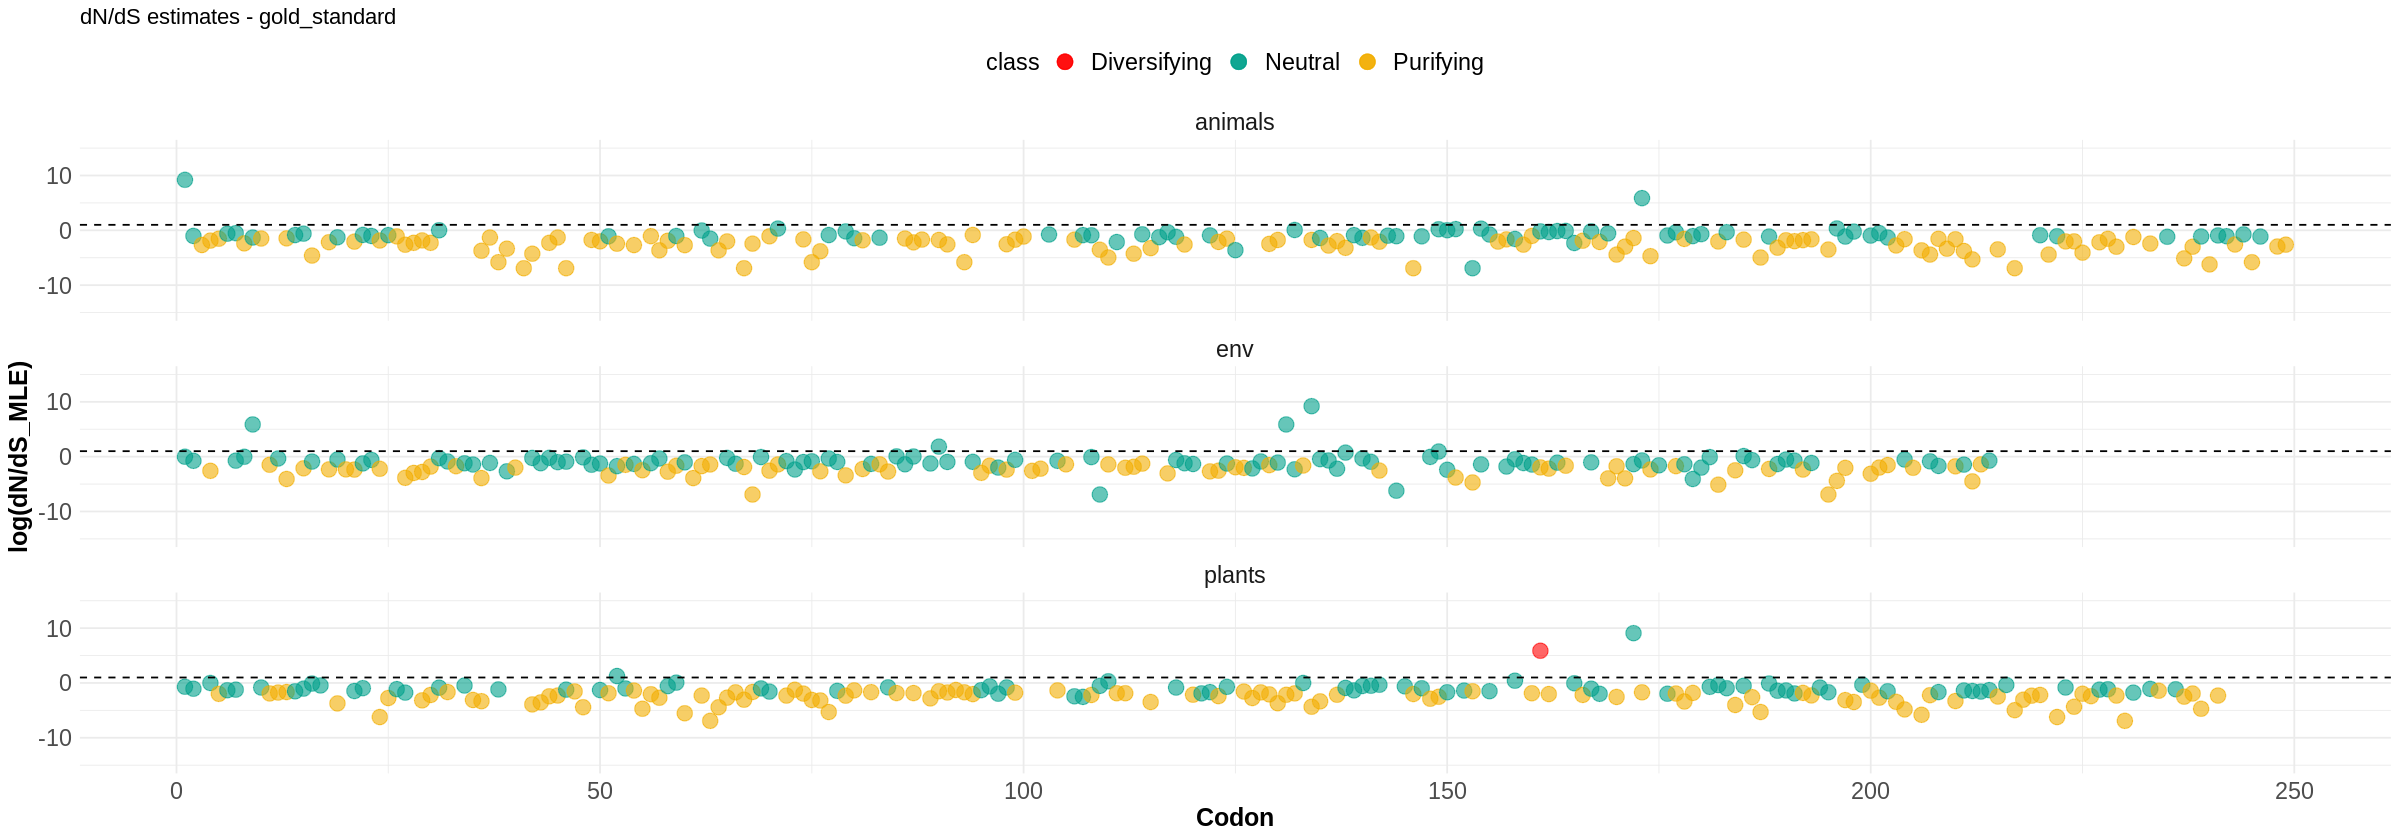

In [82]:
options(repr.plot.width=20)
ggplot(fel.goldst,aes(codon,log_dNdS,color=class))+ #,shape=dataset
geom_point(data = fel.goldst[fel.goldst$dataset=="animals",],alpha=0.6,size=4)+
geom_point(data = fel.goldst[fel.goldst$dataset=="plants",],alpha=0.6,size=4)+#,pch=15)+
geom_point(data = fel.goldst[fel.goldst$dataset=="env",],size=4,alpha=0.6)+#,pch=17)+
ylim(c(-15,15))+
theme_minimal()+
scale_color_manual(values = pal)+
geom_hline(yintercept=1,linetype="dashed",col="black")+
theme(axis.title.x = element_text(size=15,face="bold"),
     axis.title.y = element_text(size=15,face="bold"),
     axis.text = element_text(size=14),
      axis.text.x = element_text(size=14),
     strip.text.x = element_text(size=14),
     legend.text = element_text(size=14),
     legend.title = element_text(size=14),
     legend.position = "top")+
ggtitle("dN/dS estimates - gold_standard")+
xlab("Codon")+
ylab("log(dN/dS_MLE)")+
facet_wrap(~dataset,nrow=3)

In [ ]:
# cuantos hay en total diversifying en cada ambiente? diferencias significativas?


In [ ]:
library(ggpubr)

In [26]:
head(fel.goldst)

partition,codon,alpha,beta,alpha=beta,LRT,p-value,Total_branch_length,dN/dS_LB,dN/dS_MLE,dN/dS_UB,p-asmp,class,dataset,log_dNdS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,1,0.000,0.063,0.064,0.299,0.5743,1.900,6807.000,1.00e+04,1.00e+04,0.5843,Neutral,animals,9.210340
1,2,0.829,0.299,0.393,2.993,0.1287,11.688,0.192,3.60e-01,6.31e-01,0.0836,Neutral,animals,-1.021651
1,3,1.200,0.083,0.229,17.935,0.0099,6.810,0.024,6.90e-02,1.55e-01,0.0000,Purifying,animals,-2.673649
1,4,0.966,0.148,0.180,3.389,0.0693,5.349,0.071,1.53e-01,2.91e-01,0.0656,Purifying,animals,-1.877317
1,5,0.675,0.146,0.220,5.132,0.0396,6.534,0.097,2.16e-01,4.17e-01,0.0235,Purifying,animals,-1.532477
1,6,0.414,0.224,0.254,0.719,0.4257,7.536,0.273,5.41e-01,9.82e-01,0.3966,Neutral,animals,-0.614336


In [44]:
library(ggpubr)

In [95]:
counts.fel.goldst = count(fel.goldst,class,dataset)
counts.fel.goldst <- counts.fel.goldst %>%
  group_by(dataset, class) %>%
  summarise(n = sum(n)) %>%
  ungroup() %>%
  group_by(dataset) %>%
  mutate(proportion = n / sum(n)) %>%
  ungroup()

`summarise()` has grouped output by 'dataset'. You can override using the `.groups` argument.


In [96]:
counts.fel.goldst

dataset,class,n,proportion
<chr>,<chr>,<int>,<dbl>
animals,Neutral,73,0.388297872
animals,Purifying,115,0.611702128
env,Neutral,96,0.564705882
env,Purifying,74,0.435294118
plants,Diversifying,1,0.005291005
plants,Neutral,80,0.423280423
plants,Purifying,108,0.571428571


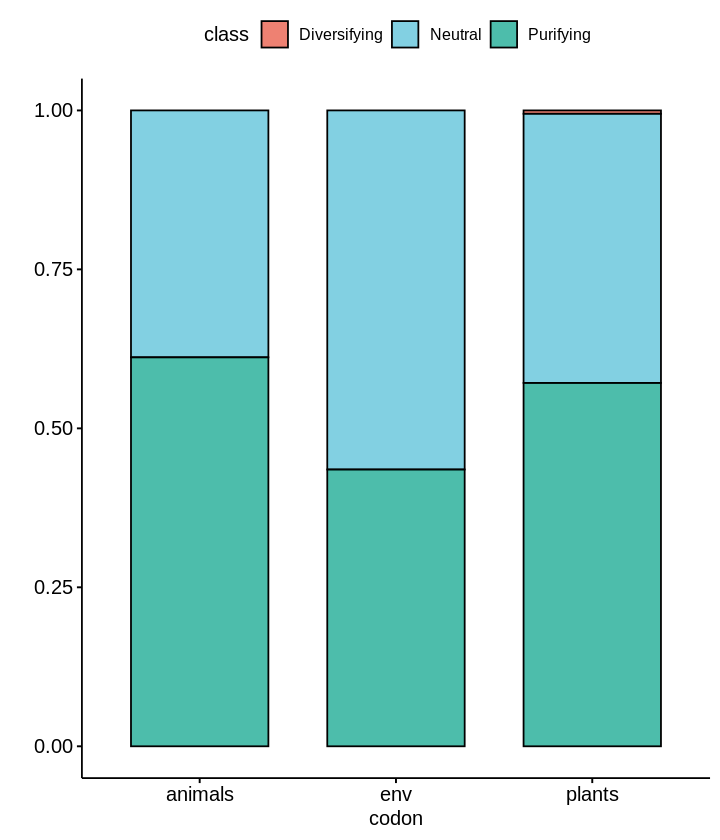

In [97]:
options(repr.plot.width=6)
my_comparisons = list(c("animals","env"),c("animals","plants"),c("env","plants"))

ggbarplot(data=counts.fel.goldst, x = "dataset", y = "proportion",
           xlab = "codon", ylab = "",
           palette="npg",
           fill="class",alpha=0.7)#+
#           stat_compare_means(comparisons = my_comparisons)#+, label.y = c(600,635,640))+
#stat_compare_means(label.y=700)


In [12]:
onlyneutral.goldst = filter(fel.goldst,class=="Neutral") 
onlynegative.goldst = filter(fel.goldst,class=="Purifying")

In [13]:
count(onlynegative.goldst,dataset)

dataset,n
<chr>,<int>
animals,115
env,74
plants,108


Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”


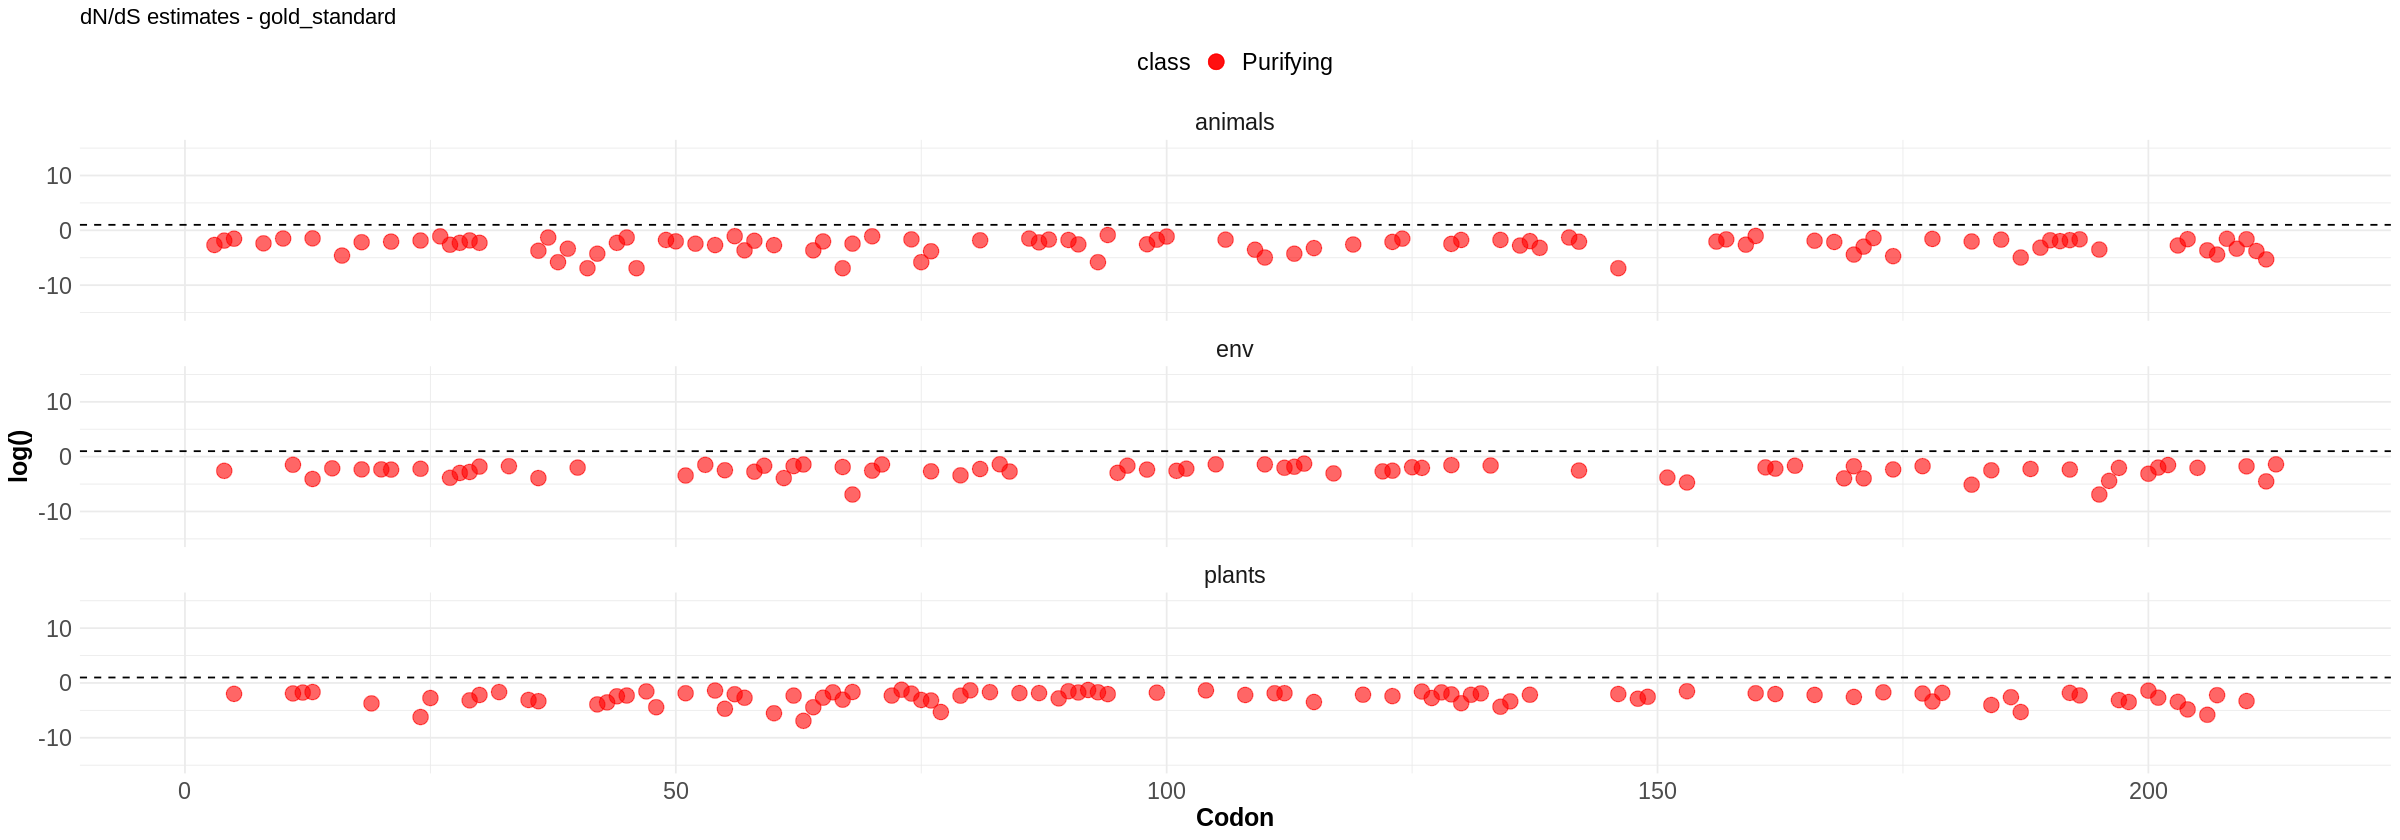

In [14]:
options(repr.plot.width=20)
ggplot(onlynegative.goldst,aes(codon,log(`dN/dS_MLE`),color=class))+ #,shape=dataset
geom_point(data = onlynegative.goldst[onlynegative.goldst$dataset=="animals",],alpha=0.6,size=4)+
geom_point(data = onlynegative.goldst[onlynegative.goldst$dataset=="plants",],alpha=0.6,size=4)+#,pch=15)+
geom_point(data = onlynegative.goldst[onlynegative.goldst$dataset=="env",],size=4,alpha=0.6)+#,pch=17)+
ylim(c(-15,15))+
xlim(c(0,214))+
theme_minimal()+
scale_color_manual(values = pal)+
geom_hline(yintercept=1,linetype="dashed",col="black")+
theme(axis.title.x = element_text(size=15,face="bold"),
     axis.title.y = element_text(size=15,face="bold"),
     axis.text = element_text(size=14),
      axis.text.x = element_text(size=14),
     strip.text.x = element_text(size=14),
     legend.text = element_text(size=14),
     legend.title = element_text(size=14),
     legend.position = "top")+
ggtitle("dN/dS estimates - gold_standard")+
xlab("Codon")+
ylab("log()")+
facet_wrap(~dataset,nrow=3)

### CompleteSet - pervasive selection

In [15]:
fel.compl.animals = read_tsv("Files_for_Selection_completeSet//FEL_results//FEL_results_completeSet_animals.txt")
fel.compl.plants = read_tsv("Files_for_Selection_completeSet//FEL_results//FEL_results_completeSet_plants.txt")
fel.compl.env = read_tsv("Files_for_Selection_completeSet//FEL_results//FEL_results_completeSet_env.txt")

Rows: 157 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): class
dbl (12): partition, codon, alpha, beta, alpha=beta, LRT, p-value, Total_bra...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 157 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): class
dbl (12): partition, codon, alpha, beta, alpha=beta, LRT, p-value, Total_bra...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 140 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): class
dbl (12): partition, codon, alpha, bet

In [16]:
fel.complete = rbind(fel.compl.animals%>%mutate(dataset="animals"),
                          fel.compl.plants%>%mutate(dataset="plants"),
                          fel.compl.env %>% mutate(dataset="env"))

In [17]:
nrow(fel.compl.env)

[1] 140

In [328]:
options(repr.plot.width=20)

fig15a=ggplot(fel.complete,aes(codon,`dN/dS_MLE`,color=class))+
geom_point(data = fel.complete[fel.complete$dataset=="animals",],alpha=0.6,size=4)+
geom_point(data = fel.complete[fel.complete$dataset=="plants",],alpha=0.6,size=4)+#,pch=15)+
geom_point(data = fel.complete[fel.complete$dataset=="env",],size=4,alpha=0.6)+#,pch=17)+
ylim(c(-2,2))+
#xlim(c(0,140))+
theme_pubr()+
scale_color_manual(values = c("Neutral"="#7570B3","Purifying"="#D95F02"))+
geom_hline(yintercept=1,linetype="dashed",col="darkgrey")+
theme(axis.title.x = element_text(size=15,face="bold"),
     axis.title.y = element_text(size=15,face="bold"),
     axis.text = element_text(size=12),
     strip.text.x = element_text(size=14,face="bold",hjust=0),
     legend.text = element_text(size=14),
     legend.title = element_text(size=14),
     legend.position = "top",
     legend.justification="left",
     plot.tag = element_text(size=20,face="bold"),
     plot.title = element_text(face="bold",size=20))+
labs(tag="A")+
ggtitle("Pervasive selection")+
facet_wrap(~dataset,nrow=3)

In [86]:
counts.fel.complete = count(fel.complete,class,dataset)
counts.fel.complete <- counts.fel.complete %>%
  group_by(dataset, class) %>%
  summarise(n = sum(n)) %>%
  ungroup() %>%
  group_by(dataset) %>%
  mutate(proportion = n / sum(n)) %>%
  ungroup()

`summarise()` has grouped output by 'dataset'. You can override using the `.groups` argument.


In [98]:
counts.fel.complete

dataset,class,n,proportion
<chr>,<chr>,<int>,<dbl>
animals,Neutral,2,0.01273885
animals,Purifying,155,0.98726115
env,Neutral,18,0.12857143
env,Purifying,122,0.87142857
plants,Neutral,9,0.05732484
plants,Purifying,148,0.94267516


In [320]:
options(repr.plot.width=6)
#my_comparisons = list(c("animals","env"),c("animals","plants"),c("env","plants"))
order = c("animals","env","plants")
fig15b=ggbarplot(data=counts.fel.complete, x = "dataset", y = "proportion",
           xlab = "biome", ylab = "",
           palette=c("#7570B3","#D95F02"),
           fill="class",alpha=0.6)+
ylab("Proportion")+
xlab("Biome")+
labs_pubr()+
theme(
legend.justification="left",
     plot.tag = element_text(size=20,face="bold"),
     plot.title = element_text(face="bold",size=20),
    axis.text = element_text(size=16),
legend.text = element_text(size=16))+
labs(tag="B")+
ggtitle("Pervasive selection")#+
#    scale_fill_discrete(names="dataset",labels=c("animals"="Animals","env"="FL","plants"="Plants"))



### Figures thesis

In [154]:
library(gridExtra)

In [169]:
lay <- rbind(c(1,1,1,2),
             c(1,1,1,2))
grobs.plots = list(fig15a,fig15b)

In [174]:
figures_path = "/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/Figures/"

In [185]:
pdf(file.path(figures_path,"Figure15AB.pdf"), width = 17, height = 6)
grid.arrange(grobs = grobs.plots, layout_matrix = lay)
dev.off()

png 
  2

In [ ]:
png(file.path(figures_path,"Figure15AB.png"), width = 17, height = 5)
grid.arrange(grobs = grobs.plots, layout_matrix = lay)
dev.off()

png 
  2

### UniqueSet - pervasive selection

In [19]:
fel.unique.animals = read_tsv("Files_for_selection_uniqueBiome/FEL_results/FEL_results_uniqueBiome_animals.txt")
fel.unique.plants = read_tsv("Files_for_selection_uniqueBiome/FEL_results/FEL_results_uniqueBiome_plants.txt") %>% filter(class!="Invariable")
fel.unique.env = read_tsv("Files_for_selection_uniqueBiome/FEL_results/FEL_results_uniqueBiome_env.txt")

Rows: 189 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): class
dbl (9): partition, codon, alpha, beta, alpha=beta, LRT, p-value, Total_bran...
num (3): dN/dS_LB, dN/dS_MLE, dN/dS_UB

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 217 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): class
dbl (9): partition, codon, alpha, beta, alpha=beta, LRT, p-value, Total_bran...
num (3): dN/dS_LB, dN/dS_MLE, dN/dS_UB

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 240 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────

In [20]:
fel.unique = rbind(fel.unique.animals%>%mutate(dataset="animals"),
                          fel.unique.plants%>%mutate(dataset="plants"),
                          fel.unique.env %>% mutate(dataset="env"))

In [21]:
count(fel.unique.plants,class)

class,n
<chr>,<int>
Diversifying,2
Neutral,113
Purifying,101


In [22]:
#Remove all 'Inf' values derived from log transforming the data
fel.unique <- fel.unique[!is.infinite(log(fel.unique$`dN/dS_MLE`)), ]

In [102]:
filter(fel.unique, class=="Diversifying")

partition,codon,alpha,beta,alpha=beta,LRT,p-value,Total_branch_length,dN/dS_LB,dN/dS_MLE,dN/dS_UB,p-asmp,class,dataset
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,26,1.545,547.571,250.336,0.000,0.001,4396.569,0.440,354.477,10000,1.0000,Diversifying,plants
1,144,1.270,72.846,52.698,0.000,0.001,925.520,0.334,57.382,10000,0.9999,Diversifying,plants
1,110,0.000,7.995,337.226,0.239,0.001,6987.537,8977.510,10000.000,10000,0.6247,Diversifying,env
1,128,0.000,1.489,0.730,5.042,0.073,15.130,8868.500,10000.000,10000,0.0247,Diversifying,env


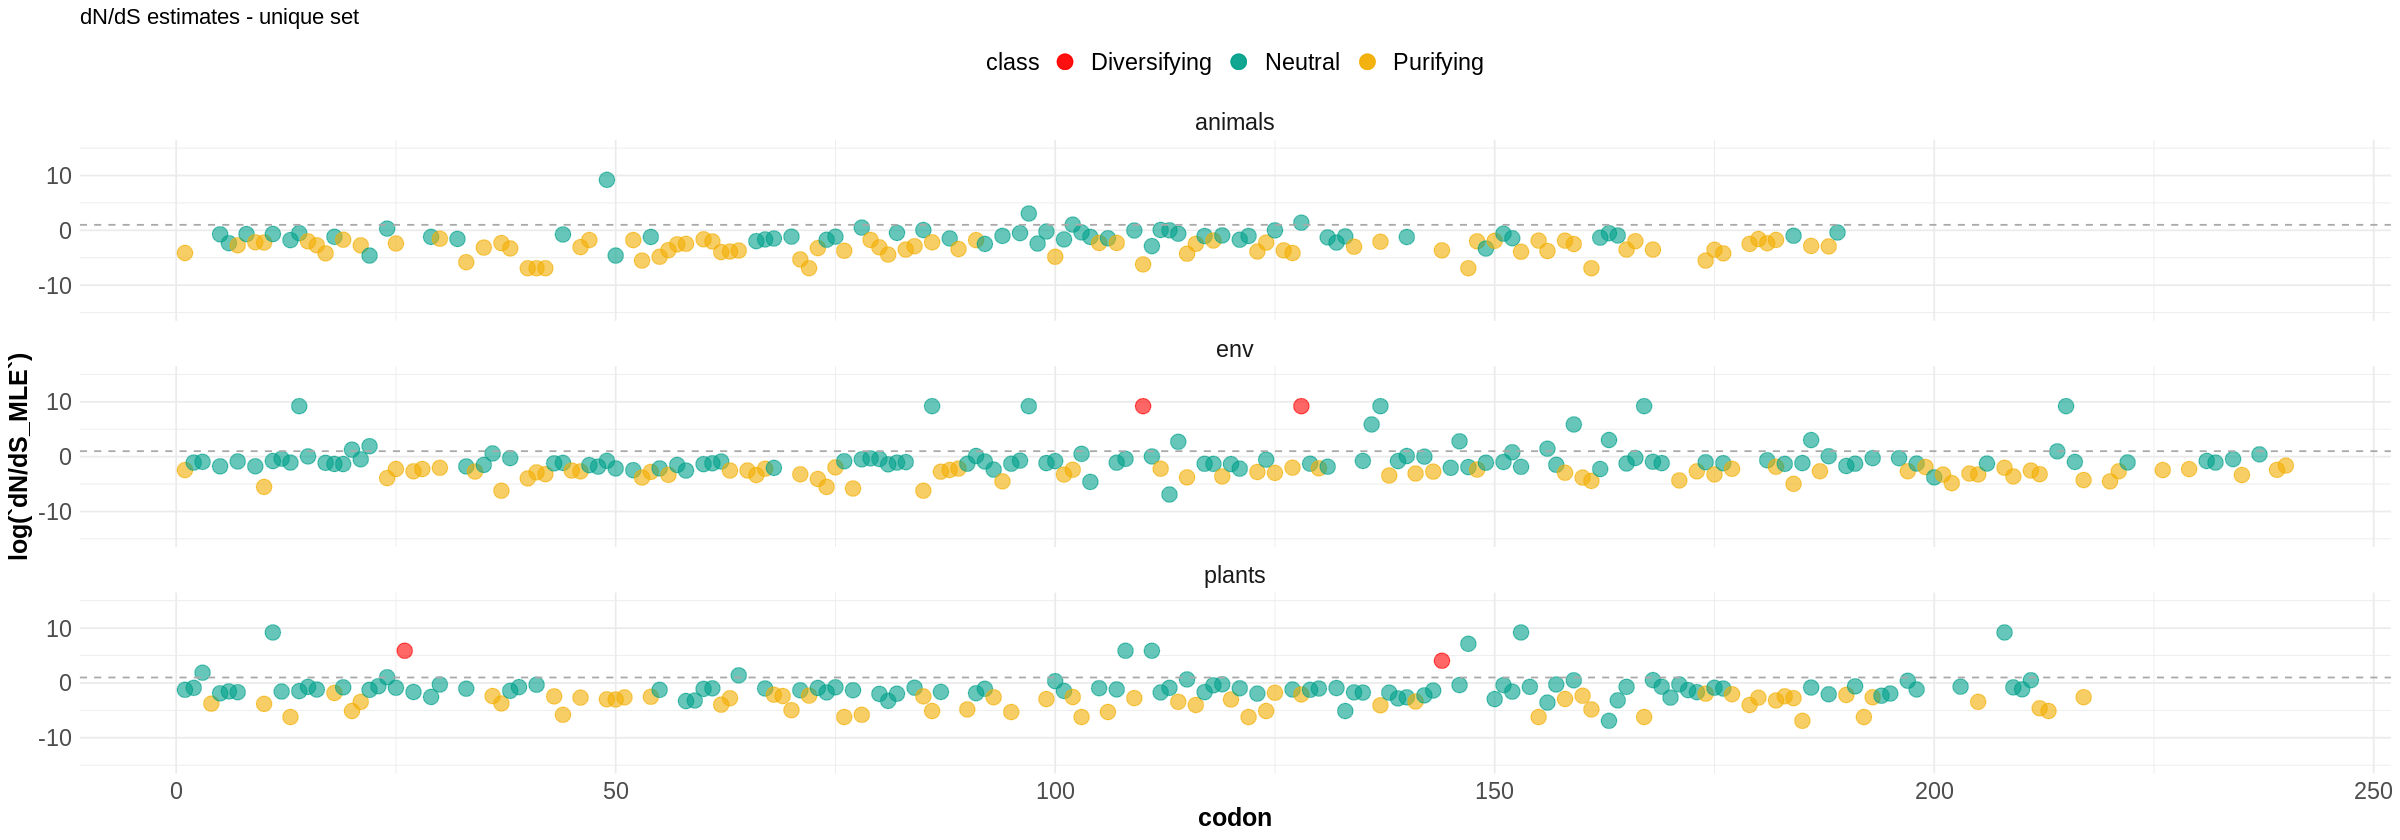

In [83]:
options(repr.plot.width=20)
ggplot(fel.unique,aes(codon,log(`dN/dS_MLE`),color=class))+
geom_point(data = fel.unique[fel.unique$dataset=="animals",],alpha=0.6,size=4)+
geom_point(data = fel.unique[fel.unique$dataset=="plants",],alpha=0.6,size=4)+#,pch=15)+
geom_point(data = fel.unique[fel.unique$dataset=="env",],size=4,alpha=0.6)+#,pch=17)+
ylim(c(-15,15))+
theme_minimal()+
scale_color_manual(values = pal)+
geom_hline(yintercept=1,linetype="dashed",col="darkgrey")+
theme(axis.title.x = element_text(size=15,face="bold"),
     axis.title.y = element_text(size=15,face="bold"),
     axis.text = element_text(size=14),
      axis.text.x = element_text(size=14),
     strip.text.x = element_text(size=14),
     legend.text = element_text(size=14),
     legend.title = element_text(size=14),
     legend.position = "top")+
ggtitle("dN/dS estimates - unique set")+
facet_wrap(~dataset,nrow=3)

In [84]:
counts.fel.unique <- counts.fel.unique %>%
  group_by(dataset, class) %>%
  summarise(n = sum(n)) %>%
  ungroup() %>%
  group_by(dataset) %>%
  mutate(proportion = n / sum(n)) %>%
  ungroup()

`summarise()` has grouped output by 'dataset'. You can override using the `.groups` argument.


In [101]:
counts.fel.unique

dataset,class,n,proportion
<chr>,<chr>,<int>,<dbl>
animals,Neutral,59,0.43065693
animals,Purifying,78,0.56934307
env,Diversifying,2,0.01086957
env,Neutral,110,0.59782609
env,Purifying,72,0.39130435
plants,Diversifying,2,0.01212121
plants,Neutral,101,0.61212121
plants,Purifying,62,0.37575758


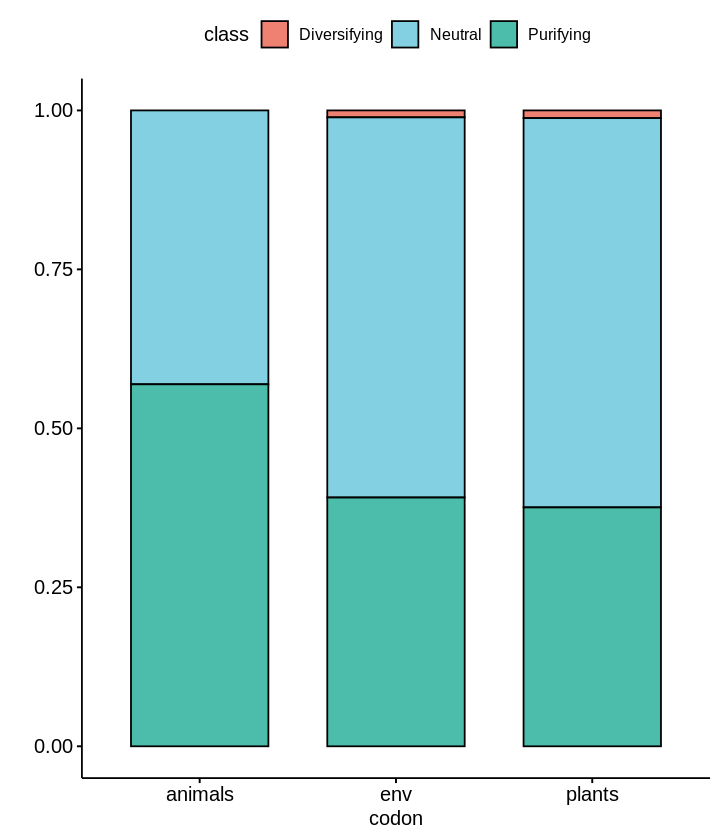

In [85]:
options(repr.plot.width=6)
my_comparisons = list(c("animals","env"),c("animals","plants"),c("env","plants"))

ggbarplot(data=counts.fel.unique, x = "dataset", y = "proportion",
           xlab = "codon", ylab = "",
           palette="npg",
           fill="class",alpha=0.7)#+
#           stat_compare_means(comparisons = my_comparisons)#+, label.y = c(600,635,640))+
#stat_compare_means(label.y=700)


# MEME results

## Complete set

In [187]:
path_meme = "/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/input_data/"

In [203]:
meme_animals.com = read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/input_data/meme_animalsComplete.tsv")
meme_env.com = read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/input_data/meme_envComplete.tsv")
meme_plants.com = read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/input_data/meme_plantComplete.tsv")

Rows: 157 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (14): Site, Partition, alpha, beta1, p_1, beta2, p_2, LRT, p_value, no_b...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 140 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (14): Site, Partition, alpha, beta1, p_1, beta2, p_2, LRT, p_value, no_b...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 157 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (14): Site, Partition, alpha, beta1, p_1, beta2, p_2, LRT, p_value, no_b...

ℹ Use

In [282]:
meme_all = rbind(meme_animals.com %>% mutate(dataset="animals"),
                meme_env.com %>% mutate(dataset="env"),
                meme_plants.com %>% mutate(dataset="plants"))%>%
                mutate(class = ifelse(p_value<0.05&LRT>2,"Diversifying","Neutral"))%>%
                rename(codon="Site")

In [211]:
count(meme_all,class)

class,n
<chr>,<int>
Diversifying,103
Neutral,351


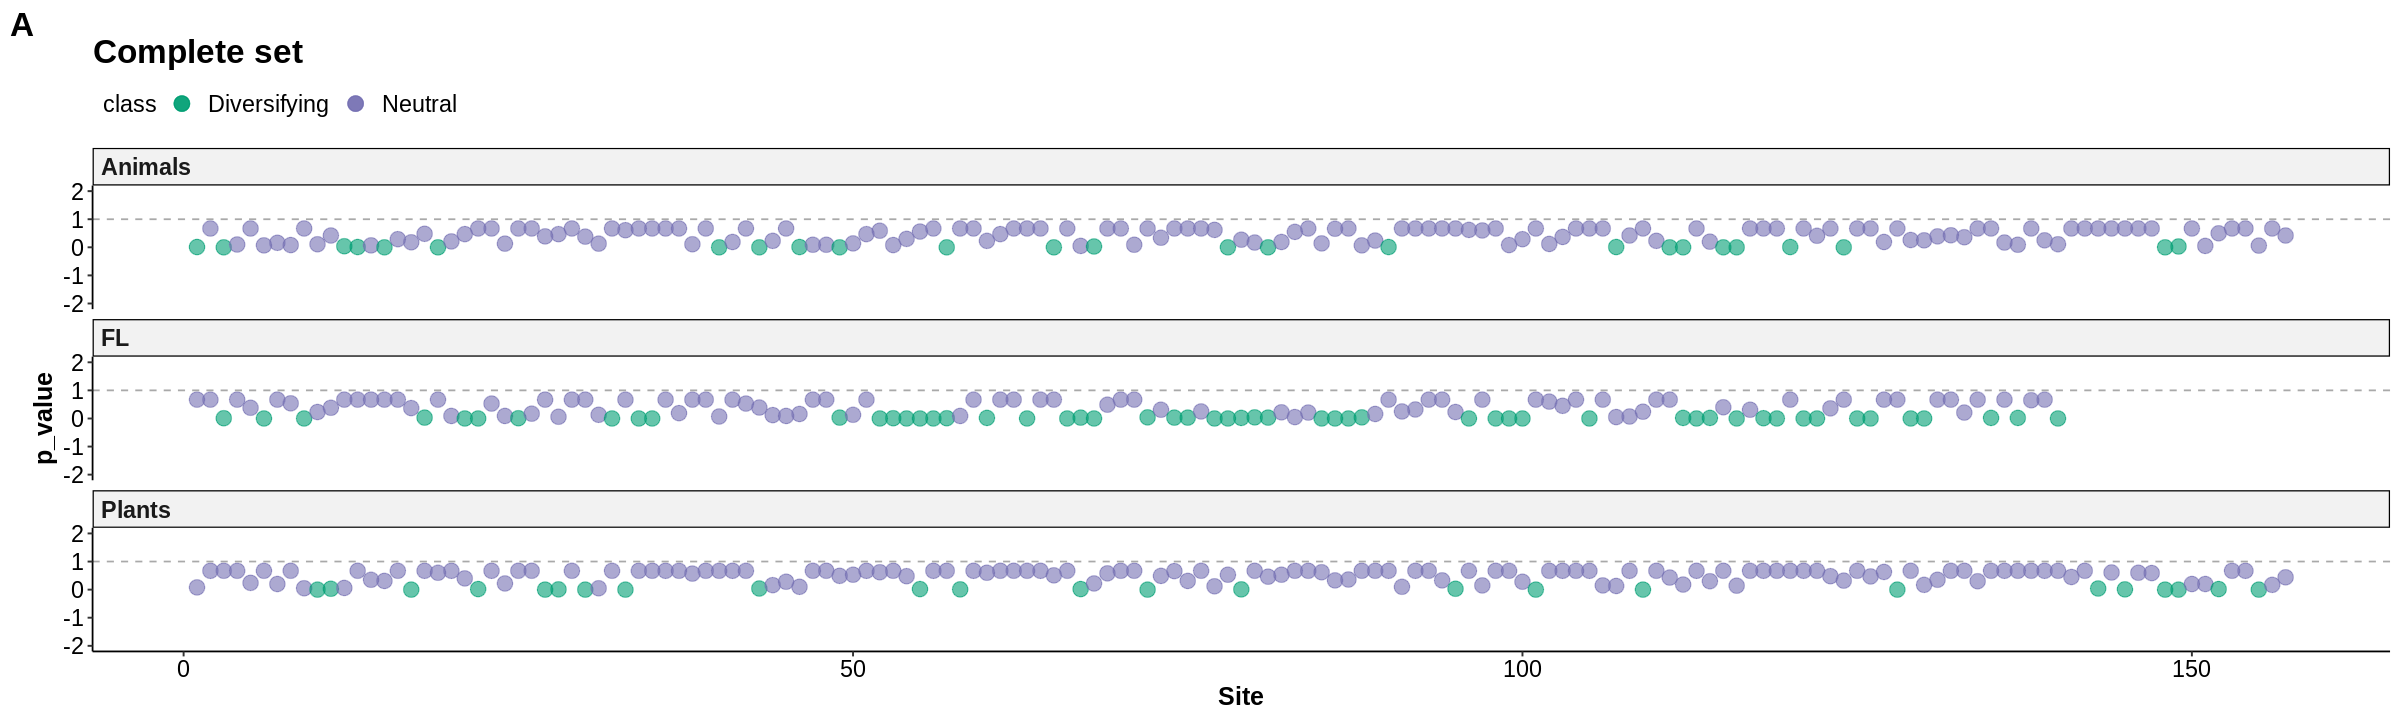

In [215]:
options(repr.plot.width=20)

ggplot(meme_all,aes(Site,p_value,color=class))+
geom_point(data = meme_all[meme_all$dataset=="Animals",],alpha=0.6,size=4)+
geom_point(data = meme_all[meme_all$dataset=="Plants",],alpha=0.6,size=4)+#,pch=15)+
geom_point(data = meme_all[meme_all$dataset=="FL",],size=4,alpha=0.6)+#,pch=17)+

ylim(c(-2,2))+
#xlim(c(0,140))+
theme_pubr()+
scale_color_manual(values = c("Neutral"="#7570B3","Diversifying"="#009E73"))+
geom_hline(yintercept=1,linetype="dashed",col="darkgrey")+
theme(axis.title.x = element_text(size=15,face="bold"),
     axis.title.y = element_text(size=15,face="bold"),
     axis.text = element_text(size=14),
      axis.text.x = element_text(size=14),
     strip.text.x = element_text(size=14,face="bold",hjust=0),
     legend.text = element_text(size=14),
     legend.title = element_text(size=14),
     legend.position = "top",
     legend.justification="left",
     plot.tag = element_text(size=20,face="bold"),
     plot.title = element_text(face="bold",size=20))+
labs(tag="A")+
ggtitle("Complete set")+
facet_wrap(~dataset,nrow=3)


In [216]:
names(meme_all)

[1] "Site"                        "Partition"                  
 [3] "alpha"                       "beta1"                      
 [5] "p_1"                         "beta2"                      
 [7] "p_2"                         "LRT"                        
 [9] "p_value"                     "no_branches_under_selection"
[11] "Total_branch_length"         "MEME_LogL"                  
[13] "FEL_LogL"                    "Variation_p"                
[15] "dataset"                     "class"

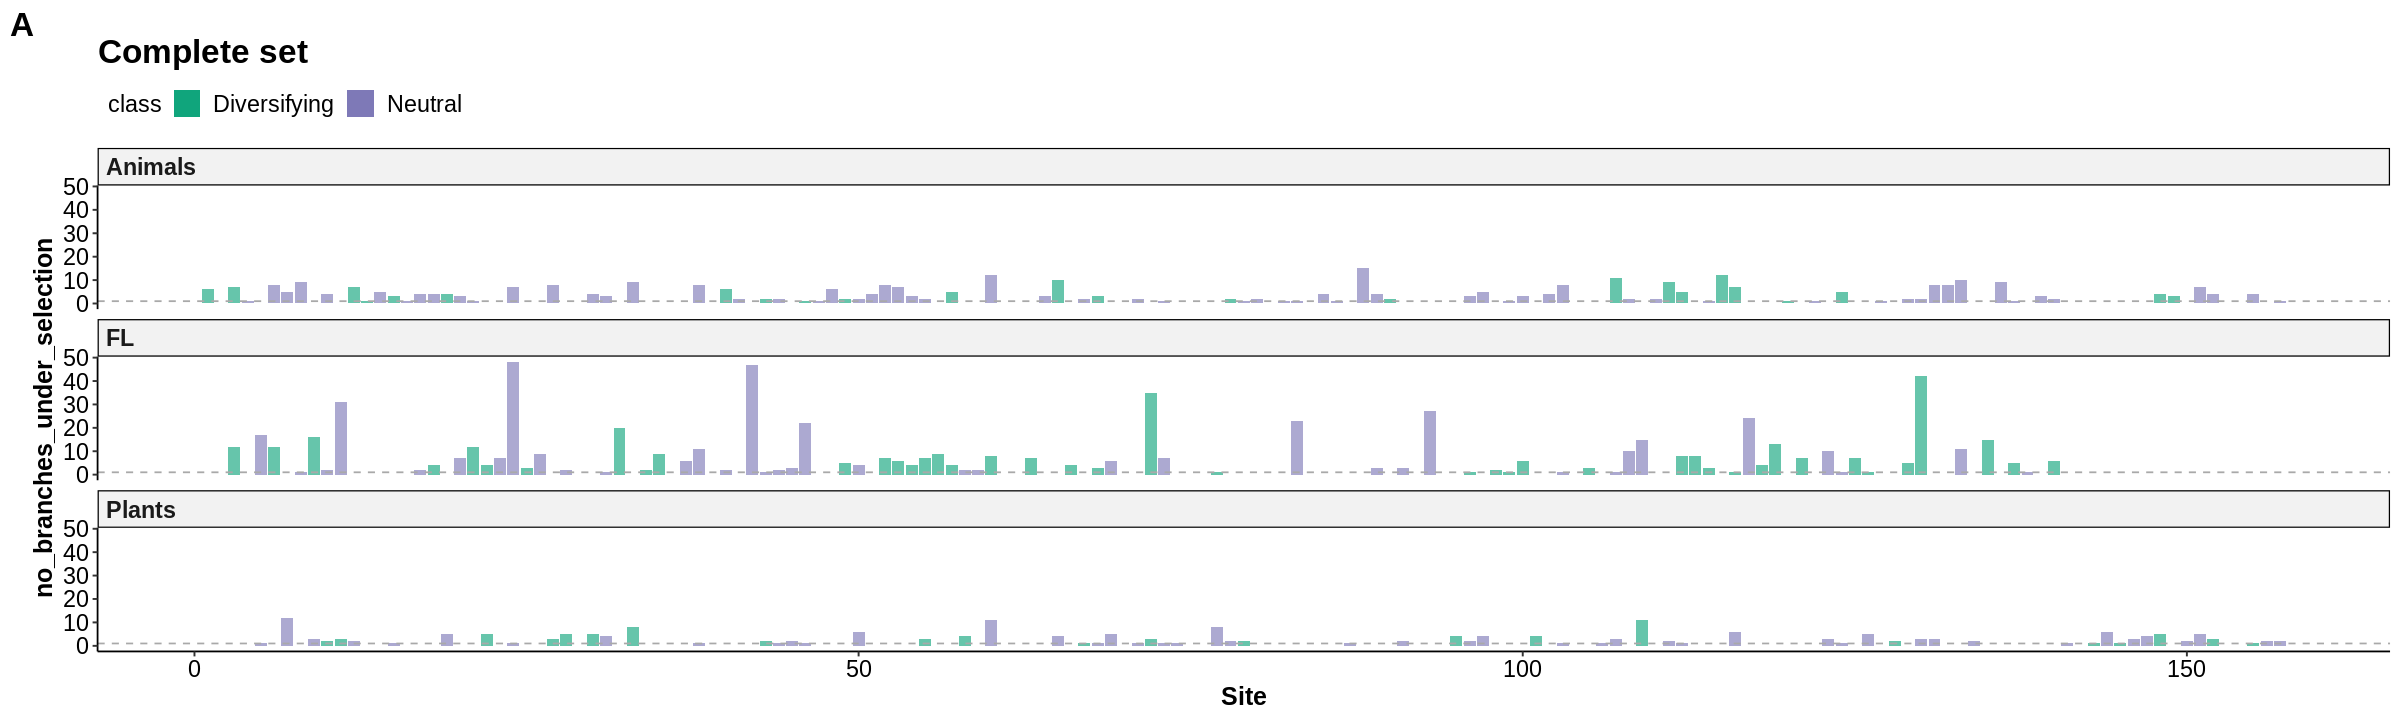

In [237]:
#options(repr.plot.width=20)

ggplot(meme_all,aes(Site,no_branches_under_selection,fill=class))+
geom_bar(data = meme_all[meme_all$dataset=="Animals",],alpha=0.6,stat="identity")+
geom_bar(data = meme_all[meme_all$dataset=="Plants",],alpha=0.6,stat="identity")+#,pch=15)+
geom_bar(data = meme_all[meme_all$dataset=="FL",],alpha=0.6,stat="identity")+#,pch=17)+

#xlim(c(0,140))+
theme_pubr()+
scale_fill_manual(values = c("Diversifying"="#009E73","Neutral"="#7570B3"))+
geom_hline(yintercept=1,linetype="dashed",col="darkgrey")+
theme(axis.title.x = element_text(size=15,face="bold"),
     axis.title.y = element_text(size=15,face="bold"),
     axis.text = element_text(size=14),
      axis.text.x = element_text(size=14),
     strip.text.x = element_text(size=14,face="bold",hjust=0),
     legend.text = element_text(size=14),
     legend.title = element_text(size=14),
     legend.position = "top",
     legend.justification="left",
     plot.tag = element_text(size=20,face="bold"),
     plot.title = element_text(face="bold",size=20))+
labs(tag="A")+
ggtitle("Complete set")+
facet_wrap(~dataset,nrow=3)


In [327]:
options(repr.plot.width=12,repr.plot.height = 6)
# Create a combined plot
fig15c = ggplot() +
  # Add points for p_value
#  geom_point(data=fel.complete,aes(x = codon, y = `dN/dS_MLE`, color = class), alpha = 0.6, size = 4) +
#  geom_point(aes(x = Site, y = p_value, color = class), alpha = 0.6, size = 4) +
  geom_segment(data=meme.complete,aes(x = codon, xend=codon,y=0, yend = no_branches_under_selection, color = class), alpha = 0.6,size=1) +
  geom_point(data=meme.complete,aes(x=codon,y=no_branches_under_selection,color=class),alpha=0.6,size=3)+
  # Common aesthetics for color and fill
  scale_color_manual(values = c("Diversifying" = "#009E73", "Neutral" = "#7570B3","Purifying"="#D95F02")) +
  scale_fill_manual(values = c("Diversifying" = "#009E73", "Neutral" = "#7570B3","Purifying"="#D95F02")) +
  geom_hline(yintercept = 1, linetype = "dashed", col = "darkgrey") +
  # Theme and labels
  theme_pubr() +
  theme(axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text = element_text(size = 12),
        strip.text.x = element_text(size = 14, face = "bold", hjust = 0),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.position = "top",
        legend.justification = "left",
        plot.tag = element_text(size = 20, face = "bold"),
        plot.title = element_text(face = "bold", size = 20)) +
  labs(tag = "C", title = "Episodic selection") +
  # Facet by dataset to separate different datasets, if applicable
  facet_wrap(~dataset, nrow = 3,scales="free_y")+
ylab("Number of branches")

In [312]:
counts.meme.complete <- count(meme.complete,class,dataset) %>%
  group_by(dataset, class) %>%
  summarise(n = sum(n)) %>%
  ungroup() %>%
  group_by(dataset) %>%
  mutate(proportion = n / sum(n)) %>%
  ungroup()

`summarise()` has grouped output by 'dataset'. You can override using the `.groups` argument.


In [321]:
options(repr.plot.width=6)
my_comparisons = list(c("animals","env"),c("animals","plants"),c("env","plants"))

fig15d = ggbarplot(data=counts.meme.complete, x = "dataset", y = "proportion",
           xlab = "codon", ylab = "",
           palette="npg",
           fill="class",alpha=0.8)+
  scale_fill_manual(values = c("Diversifying" = "#009E73", "Neutral" = "#7570B3","Purifying"="#D95F02"))+
ylab("Proportion")+
xlab("Biome")+
labs_pubr()+
theme(
legend.justification="left",
     plot.tag = element_text(size=20,face="bold"),
     plot.title = element_text(face="bold",size=20),
    axis.text = element_text(size=16),
legend.text = element_text(size=16))+
labs(tag="D")+
ggtitle("Episodic selection")#+

#+
#           stat_compare_means(comparisons = my_comparisons)#+, label.y = c(600,635,640))+
#stat_compare_means(label.y=700)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [329]:
lay <- rbind(c(1,1,1,2),
             c(3,3,3,4))

grobs.plots = list(fig15a,fig15b,fig15c,fig15d)

In [174]:
figures_path = "/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/Figures/"

In [330]:
pdf(file.path(figures_path,"Figure15.pdf"), width = 22, height = 10)
grid.arrange(grobs = grobs.plots, layout_matrix = lay)
dev.off()

png 
  2

In [372]:
grobs.plots.cd = list(fig15c,fig15d)
lay.cd = rbind(c(1,1,2),
               c(1,1,2),
               c(1,1,2))

In [376]:
pdf(file.path(figures_path,"Figure15CD.pdf"), width = 22, height = 10)
grid.arrange(grobs = grobs.plots.cd, layout_matrix = lay.cd)
dev.off()

png 
  2

In [375]:
png(file.path(figures_path,"Figure15AB_2.png"), width = 17, height = 5)
grid.arrange(grobs = grobs.plots, layout_matrix = lay)
dev.off()

png 
  2

In [291]:
#Mejorar este plot para sobreponer las visualizaciones

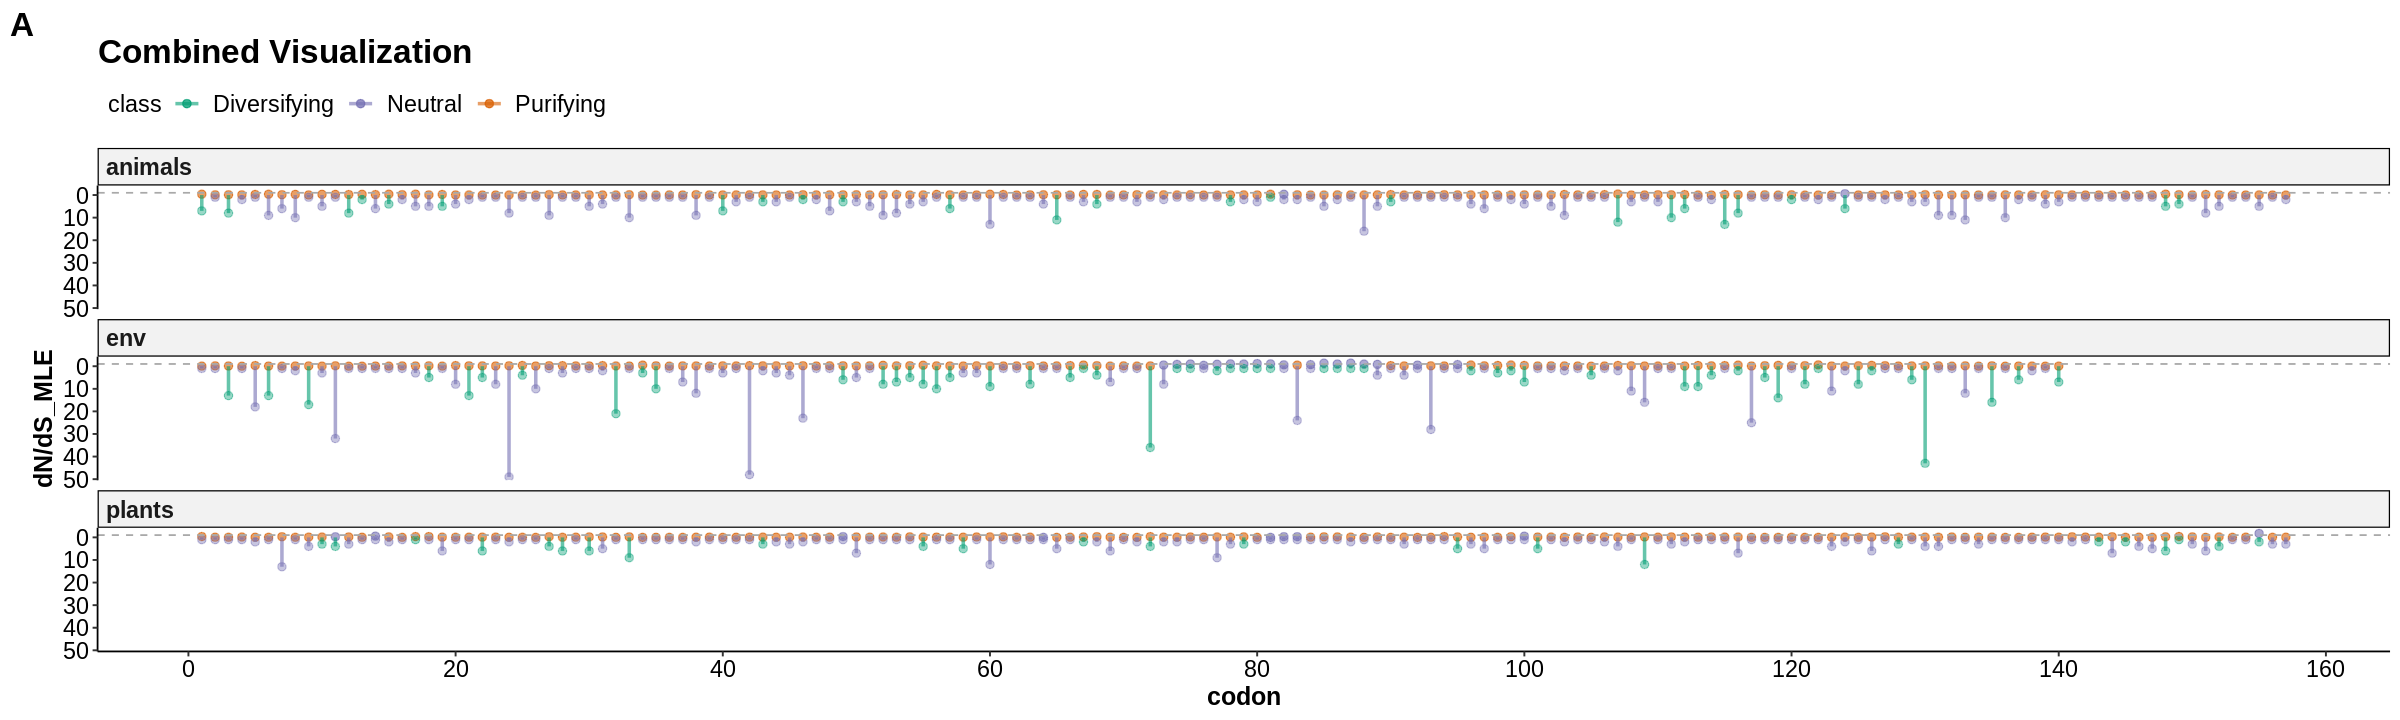

In [289]:
meme_all$no_branches_under_selection_neg <- -abs(meme_all$no_branches_under_selection)

y_axis_limits <- c(
  min(meme_all$no_branches_under_selection_neg, fel.complete$`dN/dS_MLE`),
  max(meme_all$no_branches_under_selection_neg, fel.complete$`dN/dS_MLE`)
)
# Base plot
ggplot() +
  # Add points for dN/dS_MLE from fel.complete
  geom_point(data = fel.complete, aes(x = codon, y = `dN/dS_MLE`, color = class), alpha = 0.6, size = 2) +
  # Add segments for no_branches_under_selection from meme_all
  geom_segment(data = meme_all, aes(x = codon, xend = codon, y = 0, yend = -1-no_branches_under_selection, color = class), alpha = 0.6, size = 1) +
  # Add points at the end of segments from meme_all for visual clarity
  geom_point(data = meme_all, aes(x = codon, y = -1-no_branches_under_selection, color = class), alpha = 0.4, size = 2) +
  # Define common color scale
  scale_color_manual(values = c("Diversifying" = "#009E73", "Neutral" = "#7570B3", "Purifying" = "#D95F02")) +
  # Add horizontal line
  geom_hline(yintercept = 1, linetype = "dashed", color = "darkgrey") +
  # Apply theme and labels
  theme_pubr() +
  theme(axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text = element_text(size = 14),
        axis.text.x = element_text(size = 14),
        strip.text.x = element_text(size = 14, face = "bold", hjust = 0),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.position = "top",
        legend.justification = "left",
        plot.tag = element_text(size = 20, face = "bold"),
        plot.title = element_text(face = "bold", size = 20)) +
  labs(tag = "A", title = "Combined Visualization") +
  # Define x-axis breaks
  scale_x_continuous(breaks = seq(0, 160, by = 20))+
facet_wrap(~dataset,scales="free_y",nrow=3)+
 # Adjust y-axis limits
  coord_cartesian(ylim = y_axis_limits) +
  # Adjust y-axis labels to show absolute values
  scale_y_continuous(labels = abs)


In [265]:
meme.complete = meme_all %>%
    rename(codon="Site")
head(meme.complete)

codon,Partition,alpha,beta1,p_1,beta2,p_2,LRT,p_value,no_branches_under_selection,Total_branch_length,MEME_LogL,FEL_LogL,Variation_p,dataset,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,0.57,0.07,0.85,3.48,0.15,6.98,0.01,6,0,-271.01,-259.34,0.00,Animals,Diversifying
2,1,0.67,0.09,1.00,1.00,0.00,0.00,0.67,0,0,-189.99,-189.99,1.00,Animals,Neutral
3,1,0.79,0.06,0.94,449.09,0.06,26.51,0.00,7,0,-238.47,-209.95,0.00,Animals,Diversifying
4,1,1.29,0.15,0.98,184.81,0.02,3.19,0.10,1,0,-217.56,-215.44,0.12,Animals,Neutral
5,1,0.82,0.22,1.00,1.23,0.00,0.00,0.67,0,0,-254.04,-254.04,1.00,Animals,Neutral
6,1,0.32,0.01,0.79,1.50,0.21,3.82,0.07,8,0,-204.59,-197.37,0.00,Animals,Neutral


In [ ]:
meme.complete %>%
    select(codon,no_branches_under_selection,LRT,dataset,class,p_value)

## UniqueFlagellins

In [359]:
meme_animalsUnique = read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/input_data/meme_uniqueAnimals.tsv")
meme_envUnique = read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/input_data/meme_envUnique.tsv")
meme_plantsUnique = read_tsv("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/input_data/meme_plantsUnique.tsv")

Rows: 189 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (14): Site, Partition, alpha, beta1, p_1, beta2, p_2, LRT, p_value, no_b...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 240 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (14): codon, Partition, alpha, beta1, p_1, beta2, p_2, LRT, p_value, no_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 217 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (14): codon, Partition, alpha, beta1, p_1, beta2, p_2, LRT, p_value, no_...

ℹ Use

In [361]:
meme_all_unique = rbind(meme_animalsUnique %>% mutate(dataset="Animals") %>%rename(codon="Site"),
                meme_envUnique %>% mutate(dataset="FL"),
                meme_plantsUnique %>% mutate(dataset="Plants"))%>%
                mutate(class = ifelse(p_value<0.05&LRT>2,"Diversifying","Neutral"))


In [362]:
names(meme_all_unique)

[1] "codon"                       "Partition"                  
 [3] "alpha"                       "beta1"                      
 [5] "p_1"                         "beta2"                      
 [7] "p_2"                         "LRT"                        
 [9] "p_value"                     "no_branches_under_selection"
[11] "Total_branch_length"         "MEME_LogL"                  
[13] "FEL_LogL"                    "Variation_p"                
[15] "dataset"                     "class"

In [363]:
options(repr.plot.width=12,repr.plot.height = 6)
# Create a combined plot
fig15e = ggplot() +
  # Add points for p_value
#  geom_point(data=fel.complete,aes(x = codon, y = `dN/dS_MLE`, color = class), alpha = 0.6, size = 4) +
#  geom_point(aes(x = Site, y = p_value, color = class), alpha = 0.6, size = 4) +
  geom_segment(data=meme_all_unique,aes(x = codon, xend=codon,y=0, yend = no_branches_under_selection, color = class), alpha = 0.6,size=1) +
  geom_point(data=meme_all_unique,aes(x=codon,y=no_branches_under_selection,color=class),alpha=0.6,size=3)+
  # Common aesthetics for color and fill
  scale_color_manual(values = c("Diversifying" = "#009E73", "Neutral" = "#7570B3","Purifying"="#D95F02")) +
  scale_fill_manual(values = c("Diversifying" = "#009E73", "Neutral" = "#7570B3","Purifying"="#D95F02")) +
  geom_hline(yintercept = 1, linetype = "dashed", col = "darkgrey") +
  # Theme and labels
  theme_pubr() +
  theme(axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text = element_text(size = 12),
        strip.text.x = element_text(size = 14, face = "bold", hjust = 0),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.position = "top",
        legend.justification = "left",
        plot.tag = element_text(size = 20, face = "bold"),
        plot.title = element_text(face = "bold", size = 20)) +
  labs(tag = "E", title = "Episodic selection") +
  # Facet by dataset to separate different datasets, if applicable
  facet_wrap(~dataset, nrow = 3,scales="free_y")+
ylab("Number of branches")

In [364]:
counts.meme.unique <- count(meme_all_unique,class,dataset) %>%
  group_by(dataset, class) %>%
  summarise(n = sum(n)) %>%
  ungroup() %>%
  group_by(dataset) %>%
  mutate(proportion = n / sum(n)) %>%
  ungroup()

`summarise()` has grouped output by 'dataset'. You can override using the `.groups` argument.


In [365]:
#options(repr.plot.width=6)
#my_comparisons = list(c("animals","env"),c("animals","plants"),c("env","plants"))

fig15f = ggbarplot(data=counts.meme.unique, x = "dataset", y = "proportion",
           xlab = "codon", ylab = "",
           palette="npg",
           fill="class",alpha=0.8)+
  scale_fill_manual(values = c("Diversifying" = "#009E73", "Neutral" = "#7570B3","Purifying"="#D95F02"))+
ylab("Proportion")+
xlab("Biome")+
labs_pubr()+
theme(
legend.justification="left",
     plot.tag = element_text(size=20,face="bold"),
     plot.title = element_text(face="bold",size=20),
    axis.text = element_text(size=16),
legend.text = element_text(size=16))+
labs(tag="F")+
ggtitle("Episodic selection")#+

#+
#           stat_compare_means(comparisons = my_comparisons)#+, label.y = c(600,635,640))+
#stat_compare_means(label.y=700)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [366]:
lay <- rbind(c(1,1,1,2),
             c(3,3,3,4),
             c(5,5,5,6))

grobs.plots = list(fig15a,fig15b,fig15c,fig15d,fig15e,fig15f)

In [174]:
figures_path = "/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/Figures/"

In [367]:
pdf(file.path(figures_path,"Figure15_2.pdf"), width = 25, height = 20)
grid.arrange(grobs = grobs.plots, layout_matrix = lay)
dev.off()

png 
  2